In [1]:
# 9장 

In [2]:
# 인공지능 베이스 - 디지털 선호 처리

# 디지털 필터의 2가지 (어떤 개념을 적용하더라도 이 2가지 개념을 벗어날 수 없음)
# CNN - FIR 필터 (이전의 값에 영향 받지 않음) ->> 주가 분석 뿐만 아니라 음성 분석도 가능
# RNN, LSTM - IIR 필터 (이전 값이 현재 결과에 영향을 줌) ->> 주가 분석 뿐만 아니라 음성 분석도 가능
# 보통 이 2개 섞어서 씀!

# 피드백(IIR만 피드백 됨)을 준다는 개념은 특정값을 찾아 수렴시키는 것이라 보면 된다.
# 커드쿼터, 텍(헥)사쿼터 만든다고 하면 제일 중요한 것이 균형 맞추는 것!
# 특정값을 찾아 수렴시키는 것 ( = 헬기의 균형을 찾는 것과 같은 의미)
# 어떤 특정 위치에서 고정이 되어 있어야 함.
# 하지만, 센서데이터는 고정되어 있지 않으니까!!

# 주가에서는 이전에 어떤 이벤트, 영향이 있었나의 영향을 받음!! (현재의 결과에 영향이 있음!)
# 주식쪽으로 마이크로 펀딩 하고 싶다면 => FPGA 필요!!! (실시간으로 하드웨어 가속하기 위한 장치)

# 피드백을 주면서 노이즈가 끼게 됨.
# 노이즈가 끼게 되면서 안정적으로 센서 데이터를 받을 수 있는 것이 IIR임!
# 현재는 이름이 RNN, LTSM으로 많이 쓰고 있지만, 결국은 IIR 필터와 같음.

In [3]:
# y(u, x) => ∂y/∂u 혹은 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!ls Applied-Deep-Learning-with-Keras/Lesson09

AAPL_test.csv	  Activity18.ipynb  Exercise28.ipynb
AAPL_train.csv	  Activity19.ipynb  MSFT_test.csv
Activity17.ipynb  Exercise27.ipynb  MSFT_train.csv


In [6]:
trainSet = pd.read_csv("Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv")
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [7]:
trainSetOpen = trainSet.iloc[:, 1:2].values
trainSetOpen

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
trainSetScaled = sc.fit_transform(trainSetOpen)
trainSetScaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [10]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(trainSetScaled[i - 60:i, 0])
    y_train.append(trainSetScaled[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [13]:
model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))


In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0240
Epoch 2/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0026
Epoch 3/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0021
Epoch 4/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0021
Epoch 5/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0021
Epoch 6/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0014
Epoch 13/100
38/38 [=====

In [15]:
testSet = pd.read_csv("Applied-Deep-Learning-with-Keras/Lesson09/AAPL_test.csv")
testSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,157.245605,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,141.582779,91244100
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,147.626846,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,147.298264,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,150.106216,41025300


In [16]:
actualStock = testSet.iloc[:, 1:2].values
actualStock

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [17]:
trainSet['Open']

0        79.382858
1        78.980003
2        76.778572
3        77.760002
4        76.972855
           ...    
1253    148.149994
1254    148.300003
1255    155.839996
1256    157.500000
1257    158.529999
Name: Open, Length: 1258, dtype: float64

In [18]:
testSet['Open']

0     154.889999
1     143.979996
2     144.529999
3     148.699997
4     149.559998
5     151.289993
6     152.500000
7     152.880005
8     150.850006
9     150.270004
10    153.080002
11    154.199997
12    157.500000
13    156.410004
14    154.149994
15    154.110001
16    155.479996
17    155.789993
18    156.250000
19    163.250000
20    166.110001
Name: Open, dtype: float64

In [19]:
total = pd.concat(
    (trainSet['Open'], testSet['Open']),
    axis = 0
)

In [20]:
inputs = total[len(total) - len(testSet) - 60: ]. values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predictedStock = model.predict(X_test)
predictedStock = sc.inverse_transform(predictedStock)

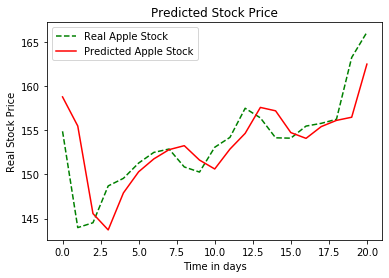

In [21]:
plt.plot(actualStock, color = 'green', label = 'Real Apple Stock', ls = '--')
plt.plot(predictedStock, color = 'red', label = 'Predicted Apple Stock', ls = '-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()

# IIR 필터의 특성이 나타나고 있음
# 위상이 뒤틀린다. (데이터 예측을 얼마나 할 수 있는지는 모르지만.)
# 약 이틀 차이가 남. -> 이것이 위상이 뒤틀린다!
# 하지만, 주식은 이렇게 이틀 차이가 나면 큰일 남!

In [ ]:
# p.337 실습 28

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
! ls Applied-Deep-Learning-with-Keras/Lesson09

AAPL_test.csv	  Activity18.ipynb  Exercise28.ipynb
AAPL_train.csv	  Activity19.ipynb  MSFT_test.csv
Activity17.ipynb  Exercise27.ipynb  MSFT_train.csv


In [29]:
trainSet = pd.read_csv('Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv')
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [32]:
trainSetOpen = trainSet.iloc[:, 1:2].values
trainSetOpen

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
trainSetScaled = sc.fit_transform(trainSetOpen)
trainSetScaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [34]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(trainSetScaled[i - 60:i, 0])
    y_train.append(trainSetScaled[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [35]:
X_train = np.reshape(
    X_train, 
    (X_train.shape[0], X_train.shape[1], 1)
)
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


model = Sequential()

model.add(
    LSTM(
        100, return_sequences = True, 
        input_shape = (X_train.shape[1], 1)
    )
)
model.add(
    LSTM(100, return_sequences = True)
)
model.add(
    LSTM(100, return_sequences = True)
)
model.add(LSTM(100))
model.add(Dense(1))

In [37]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)
model.fit(
    X_train, y_train, epochs = 100, batch_size = 32
)

Epoch 1/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0276
Epoch 2/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0022
Epoch 3/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0019
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0018
Epoch 5/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0015
Epoch 6/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0013
Epoch 7/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0012
Epoch 8/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0016
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0011
Epoch 12/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0011
Epoch 13/100
38/38 [=====

In [38]:
testSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras' +
    '/Lesson09/AAPL_test.csv'
)
testSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,157.245605,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,141.582779,91244100
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,147.626846,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,147.298264,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,150.106216,41025300


In [39]:
actualStock = testSet.iloc[:, 1:2].values
actualStock

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [40]:
total = pd.concat(
    (trainSet['Open'], testSet['Open']),
    axis = 0
)

In [41]:
inputs = total[len(total) - len(testSet) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 81):
    X_test.append(inputs[i - 60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(
    X_test, 
    (X_test.shape[0], X_test.shape[1], 1)
)

predictedStock = model.predict(X_test)
predictedStock = sc.inverse_transform(predictedStock)

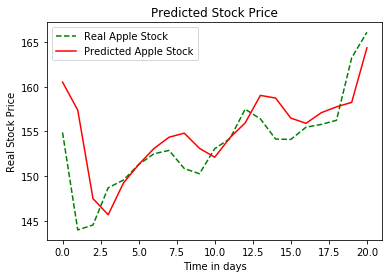

In [42]:
plt.plot(
    actualStock, color = 'green', 
    label = 'Real Apple Stock', ls='--'
)
plt.plot(
    predictedStock, color = 'red', 
    label = 'Predicted Apple Stock', ls='-'
)
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()

In [43]:
# CNN과 Spring 연동하기

In [ ]:
# 1. 새로운 터미널을 킨다.
# 2. pip uninstall -y keras
# 3. pip uninstall -y tensorflow
# 4. pip uninstall -y tensorflow-gpu
# 5. rm -rf ~/.keras
# 6. 새로 킨 터미널을 껏다가 다시 킨다.
# 7. pip install tensorflow==1.14
# 8. pip install keras==2.2.5
# 9. 터미널을 다시 껏다가 킨다.
# 10. jupyter notebook을 구동시킨다.

In [1]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image

import numpy as np

Using TensorFlow backend.
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflo

In [13]:
def prepare_img(img, target):
    img = img.resize(target)
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img = imagenet_utils.preprocess_input(img)
    
    return img

In [14]:
resModel = None

def load_model():
    global resModel
    resModel = ResNet50()

In [15]:
import keras.backend.tensorflow_backend as tb
import tensorflow as tf

global graph, model
graph = tf.get_default_graph()

print(tf.__version__)

1.14.0


In [16]:
from flask import Flask, request, jsonify
from werkzeug.utils import secure_filename

In [ ]:
app = Flask(__name__)

@app.route('/imgServer', methods = ['GET', 'POST'])
def analysis_img():
    data = {"success": False}
    if request.method == 'POST':
        print('POST')
        file = request.files['file']
        file = secure_filename(file.filename)
        print(file)
        
        sea_img = image.load_img(
            file, target_size = (224, 224)
        )
        
        trans_img = image.img_to_array(sea_img)
        trans_img = np.expand_dims(trans_img, axis = 0)
        trans_img = preprocess_input(trans_img)
        print(trans_img.shape)
        
        # 파일을 열면 닫아줘야 하는 것처럼
        # tensorflow에서도 세션을 열고 닫아줘야 함.
        # with을 넣어주면 열고, 세션을 자동으로 닫아줌.
        with graph.as_default():
            pred = resModel.predict(trans_img)
            
        label = decode_predictions(pred)
        data["predictions"] = []
        
        for (imageNetID, label, prob) in label[0]:
            r = {
                "label": label,
                "probability": float(prob)
            }
            
            data["predictions"].append(r)
            
        data["success"] = True
    
    return jsonify(data)

if __name__ == "__main__":
    load_model()
    app.run()








102858752/102853048 [==============================] - 24s 0us/step
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2020-07-20 14:56:44,030] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpo

POST
test_image_2.jpg


[2020-07-20 14:57:06,630] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-17-04b7b0606290

POST
test_image_1.jpg


[2020-07-20 14:57:49,845] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-17-04b7b0606290

POST
test_image_1.jpg


[2020-07-20 15:00:40,562] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-17-04b7b0606290

POST
test_image_2.jpg


[2020-07-20 15:01:55,774] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-17-04b7b0606290

POST
test_image_2.jpg
POST
test_image_2.jpg
(1, 224, 224, 3)
40960/35363 [==================================] - 0s 0us/step


127.0.0.1 - - [20/Jul/2020 15:04:46] "POST /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:07:46] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:08:10] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:08:15] "POST /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:08:15] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
POST(1, 224, 224, 3)

test_image_2.jpg
(1, 224, 224, 3)
